In [36]:
import torch
import torch.nn as nn
import torch.optim
import matplotlib.pyplot as plt

In [37]:
weight = 0.8
bias = 0.3

start = 0
end = 2
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

In [27]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})
  plt.xlabel("X")
  plt.ylabel("y")

In [28]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


In [29]:
torch.manual_seed(42)
model = LinearRegressionModel()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [30]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [31]:
#check the device of the model
next(model.parameters()).device

device(type='cpu')

In [32]:
#set the model to use the GPU
model.to(device)
next(model.parameters()).device

device(type='cuda', index=0)

In [33]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

In [34]:
def train_this_bitch(epochs, model, loss_fn, optimizer, X_train, y_train, X_test, y_test):
  for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #testing
    model.eval()
    with torch.inference_mode():
      test_pred = model(X_test)
      test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

In [35]:
train_this_bitch(200, model, loss_fn, optimizer, X_train, y_train, X_test, y_test)
# Data and model are not on the same device

RuntimeError: Expected all tensors to be on the same device, but got mat1 is on cpu, different from other tensors on cuda:0 (when checking argument in method wrapper_CUDA_addmm)

In [38]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [39]:
train_this_bitch(200, model, loss_fn, optimizer, X_train, y_train, X_test, y_test)

Epoch: 0 | Loss: 0.5018159747123718 | Test loss: 0.44208431243896484
Epoch: 10 | Loss: 0.3386135399341583 | Test loss: 0.1993817239999771
Epoch: 20 | Loss: 0.17541109025478363 | Test loss: 0.043320830911397934
Epoch: 30 | Loss: 0.10860166698694229 | Test loss: 0.1559308022260666
Epoch: 40 | Loss: 0.09582221508026123 | Test loss: 0.172880157828331
Epoch: 50 | Loss: 0.08639752119779587 | Test loss: 0.16590945422649384
Epoch: 60 | Loss: 0.07731565833091736 | Test loss: 0.150982066988945
Epoch: 70 | Loss: 0.06826320290565491 | Test loss: 0.1339990198612213
Epoch: 80 | Loss: 0.059211742132902145 | Test loss: 0.1166754961013794
Epoch: 90 | Loss: 0.05016225576400757 | Test loss: 0.09867104142904282
Epoch: 100 | Loss: 0.04111313447356224 | Test loss: 0.08032611757516861
Epoch: 110 | Loss: 0.032064288854599 | Test loss: 0.06232165917754173
Epoch: 120 | Loss: 0.02301480807363987 | Test loss: 0.044317200779914856
Epoch: 130 | Loss: 0.01396574079990387 | Test loss: 0.025972280651330948
Epoch: 140 

In [40]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7983]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3048], device='cuda:0'))])

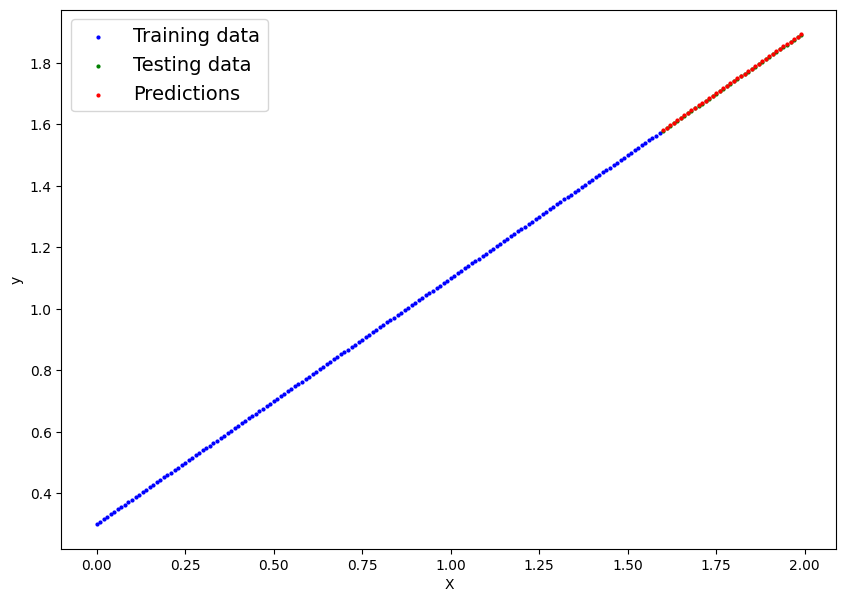

In [41]:
#evaluation
with torch.inference_mode():
  y_preds = model(X_test)
  test_loss = loss_fn(y_preds, y_test)
plot_predictions(predictions = y_preds.cpu())

In [42]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj = model.state_dict(), f = MODEL_SAVE_PATH)

In [43]:
#loading a model
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7983]])),
             ('linear_layer.bias', tensor([0.3048]))])